# ML - Intrusion Detection System

Intrusion detection is a crucial component of modern cybersecurity, helping organizations identify unauthorized access and mitigate security risks in real-time. This project will use the NSL-KDD dataset to analyze network traffic data for intrusion detection, exploring patterns in normal versus malicious activity and identifying effective ways to classify different types of attacks.

## Import Librairies

We import the needed librairies

In [121]:
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Analyse Data

Our Kaggle dataset is already separated in train and test, we need to rebuild it.

In [95]:
df = pd.concat([pd.DataFrame(arff.loadarff('Datatsets\Original_Test.arff')[0]),pd.DataFrame(arff.loadarff('Datatsets\Original_Train.arff')[0])])
df

<>:1: SyntaxWarning: invalid escape sequence '\O'
<>:1: SyntaxWarning: invalid escape sequence '\O'
<>:1: SyntaxWarning: invalid escape sequence '\O'
<>:1: SyntaxWarning: invalid escape sequence '\O'
C:\Users\antho\AppData\Local\Temp\ipykernel_19596\3612305784.py:1: SyntaxWarning: invalid escape sequence '\O'
  df = pd.concat([pd.DataFrame(arff.loadarff('Datatsets\Original_Test.arff')[0]),pd.DataFrame(arff.loadarff('Datatsets\Original_Train.arff')[0])])
C:\Users\antho\AppData\Local\Temp\ipykernel_19596\3612305784.py:1: SyntaxWarning: invalid escape sequence '\O'
  df = pd.concat([pd.DataFrame(arff.loadarff('Datatsets\Original_Test.arff')[0]),pd.DataFrame(arff.loadarff('Datatsets\Original_Train.arff')[0])])


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,...,10.0,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,b'anomaly'
1,0.0,b'tcp',b'private',b'REJ',0.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,b'anomaly'
2,2.0,b'tcp',b'ftp_data',b'SF',12983.0,0.0,b'0',0.0,0.0,0.0,...,86.0,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,b'normal'
3,0.0,b'icmp',b'eco_i',b'SF',20.0,0.0,b'0',0.0,0.0,0.0,...,57.0,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,b'anomaly'
4,1.0,b'tcp',b'telnet',b'RSTO',0.0,15.0,b'0',0.0,0.0,0.0,...,86.0,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,b'anomaly'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,25.0,0.10,0.06,0.00,0.00,1.00,1.0,0.00,0.00,b'anomaly'
125969,8.0,b'udp',b'private',b'SF',105.0,145.0,b'0',0.0,0.0,0.0,...,244.0,0.96,0.01,0.01,0.00,0.00,0.0,0.00,0.00,b'normal'
125970,0.0,b'tcp',b'smtp',b'SF',2231.0,384.0,b'0',0.0,0.0,0.0,...,30.0,0.12,0.06,0.00,0.00,0.72,0.0,0.01,0.00,b'normal'
125971,0.0,b'tcp',b'klogin',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,8.0,0.03,0.05,0.00,0.00,1.00,1.0,0.00,0.00,b'anomaly'


### Missing values


There is no missing values

In [96]:
print(df.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### Outliers

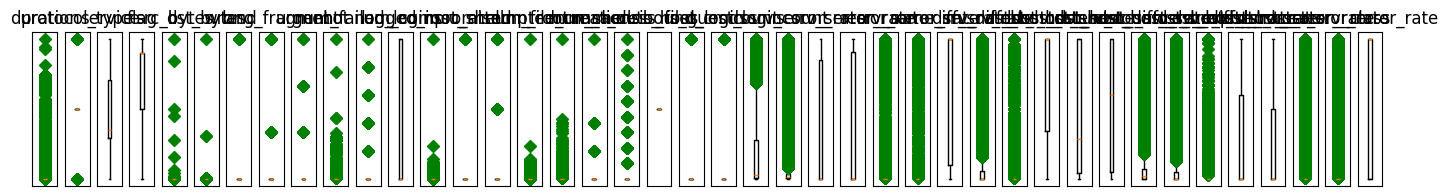

In [122]:
# IQR : 
# Les observations qui sont à plus de 1,5 IQR en dessous de Q1 ou à plus de 1,5 IQR au-dessus de Q3 sont considérées comme des valeurs aberrantes.
def find_outliers_IQR(col):
    q1=col.quantile(0.25)
    q3=col.quantile(0.75)
    IQR=q3-q1
    outliers = col[((col<(q1-1.5*IQR)) | (col>(q3+1.5*IQR)))]
    # return list of outliers
    return outliers

def dropOutliers(df):

    df_cleaned = df.copy()
    
    for col in df_cleaned.columns:
        if df_cleaned[col].dtype in ['float64', 'int64']:
            outliers = find_outliers_IQR(df_cleaned[col])
            df_cleaned = df_cleaned.drop(outliers.index)
    return df_cleaned

def boxplotOutliers(df):
    nb_columns = len(df.select_dtypes(include=["int64", "float64"]).columns)
    fig, axs = plt.subplots(1, nb_columns, figsize=(15,2))
    for i in range(nb_columns):
            column_name = df.select_dtypes(include=["int64", "float64"]).columns[i]
            axs[i].boxplot(df[column_name], 0, 'gD')
            axs[i].set_title(column_name)
            axs[i].set_xticks(())
            axs[i].set_yticks(())
    fig.subplots_adjust(left=0.08, right=0.98, hspace=0.4, wspace=0.3)

boxplotOutliers(df)

There are a lot of columns with an outstanding number of outliers. It could be interesting to drop the columns filled with unique values.

### Statistical summary

In [97]:
print(df.describe())

            duration     src_bytes     dst_bytes  wrong_fragment  \
count  148517.000000  1.485170e+05  1.485170e+05   148517.000000   
mean      276.779305  4.022795e+04  1.708885e+04        0.020523   
std      2460.683131  5.409612e+06  3.703525e+06        0.240069   
min         0.000000  0.000000e+00  0.000000e+00        0.000000   
25%         0.000000  0.000000e+00  0.000000e+00        0.000000   
50%         0.000000  4.400000e+01  0.000000e+00        0.000000   
75%         0.000000  2.780000e+02  5.710000e+02        0.000000   
max     57715.000000  1.379964e+09  1.309937e+09        3.000000   

              urgent            hot  num_failed_logins  num_compromised  \
count  148517.000000  148517.000000      148517.000000    148517.000000   
mean        0.000202       0.189379           0.004323         0.255062   
std         0.019417       2.013160           0.072248        22.231375   
min         0.000000       0.000000           0.000000         0.000000   
25%         

### Variable Definition

In [98]:
print(df.dtypes)

duration                       float64
protocol_type                   object
service                         object
flag                            object
src_bytes                      float64
dst_bytes                      float64
land                            object
wrong_fragment                 float64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                       object
num_compromised                float64
root_shell                     float64
su_attempted                   float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
num_access_files               float64
num_outbound_cmds              float64
is_host_login                   object
is_guest_login                  object
count                          float64
srv_count                      float64
serror_rate                    float64
srv_serror_rate          

We have some object column. We will have to apply label-encoding.

Our target column will be class, normal or anomaly 

### Check balance

In [120]:
print(df['class'].value_counts())

class
1    77054
0    71463
Name: count, dtype: int64


Our target column is pretty well balanced

### Correlation analysis (for numerical variables)

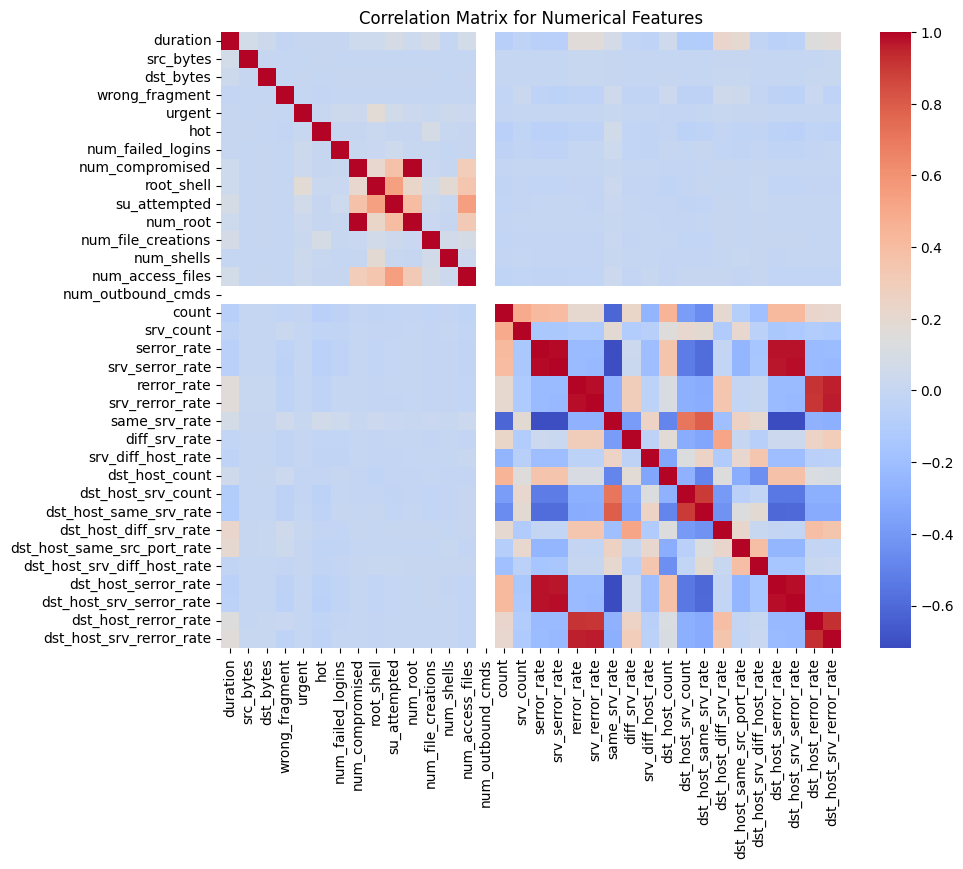

In [100]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Features")
plt.show()

## Implement Solutions for Each Task

### Pre-processing

In [101]:
def label_encode(df, columns=None):
    # If no columns are specified, select categorical columns by default
    if columns is None:
        columns = df.select_dtypes(include=['object', 'category']).columns
    
    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()

    # Apply label encoding to each specified column
    for col in columns:
        df[col] = label_encoder.fit_transform(df[col])

    return df

# Example usage:
df = label_encode(df)

# Check the result
print(df.head())

   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0       0.0              1       49     1        0.0        0.0     0   
1       0.0              1       49     1        0.0        0.0     0   
2       2.0              1       20     9    12983.0        0.0     0   
3       0.0              0       14     9       20.0        0.0     0   
4       1.0              1       60     2        0.0       15.0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0             0.0     0.0  0.0  ...                10.0   
1             0.0     0.0  0.0  ...                 1.0   
2             0.0     0.0  0.0  ...                86.0   
3             0.0     0.0  0.0  ...                57.0   
4             0.0     0.0  0.0  ...                86.0   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1                    0.00                    0.06   
2                    0.61                    0.

### Choose the right algorithms

We are in a classification problem, we'll use Logistic Regression and Random Forest. However, we might strugle if our data is too non-linear for the Logistic Regression to perform.

### Logistic Regression

In [ ]:
# Create a pipeline for Logistic Regression
pipeline_lr = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Scale numerical features
    ('model', LogisticRegression(max_iter=500,random_state=42))  # Logistic Regression model
])


### Random Forest

In [103]:
# Create a pipeline for Random Forest
pipeline_rf = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Scale numerical features
    ('model', RandomForestClassifier(criterion="entropy", n_estimators=10,max_depth=4, random_state=1))  # Random Forest model
])


## Learning and Testing

### Train and test datasets

In [104]:

Y = df['class']
X = df.drop('class', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Train models

In [ ]:
# Fit the Logistic Regression model
pipeline_lr.fit(X_train, Y_train)

# Fit the Random Forest model
pipeline_rf.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=4,
                                        n_estimators=10, random_state=1))])

### Predictions

In [ ]:
# Make predictions for Logistic Regression
Y_pred_lr = pipeline_lr.predict(X_test)

# Make predictions for Random Forest
Y_pred_rf = pipeline_rf.predict(X_test)

## Critics

### For Logistic Regression

In [117]:
accuracy = accuracy_score(Y_test, Y_pred_lr)
confusion = confusion_matrix(Y_test, Y_pred_lr)
classification_rep = classification_report(Y_test,Y_pred_lr)

print(accuracy)
print(classification_rep)
print(confusion)

0.9373485052518179
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     14158
           1       0.93      0.96      0.94     15546

    accuracy                           0.94     29704
   macro avg       0.94      0.94      0.94     29704
weighted avg       0.94      0.94      0.94     29704

[[12974  1184]
 [  677 14869]]


### For Random Forest

In [118]:
accuracy = accuracy_score(Y_test, Y_pred_rf)
confusion = confusion_matrix(Y_test, Y_pred_rf)
classification_rep = classification_report(Y_test,Y_pred_rf)

print(accuracy)
print(classification_rep)
print(confusion)

0.9628332884460006
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     14158
           1       0.94      0.99      0.97     15546

    accuracy                           0.96     29704
   macro avg       0.97      0.96      0.96     29704
weighted avg       0.96      0.96      0.96     29704

[[13209   949]
 [  155 15391]]


In both cases the metrics are very good, we might be in a case of overfitting. 

We have many columns so using PCA, drop useless columns or more complex alogrithmds are good leads. 